<a href="https://colab.research.google.com/github/amdeyk/ii_scproj/blob/main/amba_Dey_Part2_M1_NB_MiniProject_1_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Located the Data Set

In [1]:
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/wa_fn_usec_hr_employee_attrition_tsv.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


Install CAT BOOST

In [2]:
!pip -qq install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.9 MB/s eta 0:00:00


Install the other LIBs

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from catboost import CatBoostClassifier, metrics, Pool
%matplotlib inline
np.set_printoptions(precision=4)

Load the DataFrame

In [4]:
df = pd.read_csv('wa_fn_usec_hr_employee_attrition_tsv.csv')

Split the Data.  

Practically havent touched the Data in terms of Feature Engineering

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
balance_set, test_set = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_set, validation_set = train_test_split(balance_set, test_size=0.15, random_state=42, shuffle=True)

X_train = train_set.drop(['attrition','over18'], axis=1)
Y_train = train_set['attrition']

X_val = validation_set.drop(['attrition','over18'], axis=1)
Y_val = validation_set['attrition']

X_test = test_set.drop(['attrition','over18'], axis=1)
Y_test = test_set['attrition']



Deleting the Target Var and one Useless Var from the Cat Fea List

In [54]:
cat_fea = categorical_columns.values
cat_fea1 = np.delete(cat_fea, [0,7], axis=0 ) # Need to look at this Delete. right now Working with this .

Model Build Here .. Thats all 

In [43]:
model_08_04_a1 = CatBoostClassifier(iterations=500, learning_rate=0.02)

train_pool = Pool(data=X_train, label=Y_train, cat_features=cat_fea1)

model_08_04_a1.fit(train_pool, verbose=100, plot=True)  # Cant plot on Spyder - need to Check 
# model_08_04_a1.fit(train_pool, verbose=False)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6758689	total: 13.3ms	remaining: 6.66s
100:	learn: 0.2913668	total: 2.23s	remaining: 8.79s
200:	learn: 0.2224148	total: 2.8s	remaining: 4.17s
300:	learn: 0.1787137	total: 3.39s	remaining: 2.24s
400:	learn: 0.1458442	total: 3.99s	remaining: 986ms
499:	learn: 0.1217527	total: 4.57s	remaining: 0us


Check the Param on TRAIN DATA FIRST

In [60]:
model_08_04_a1.score(train_pool)

0.9679547596606974

Number of Trees ??? 

In [55]:
model_08_04_a1.tree_count_

500

How does the Decision Tree LOOK like ??

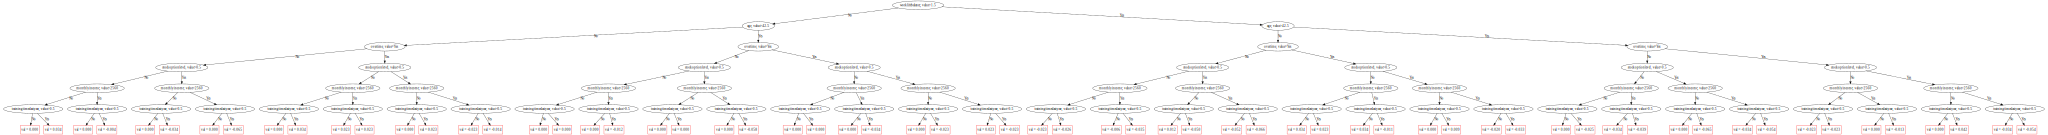

In [46]:
model_08_04_a1.plot_tree(tree_idx=0,
    pool=train_pool)  
# Basically Plot the Decision Tree here .. Just to understand

Make the Model Predict the Un-Known  TEST Data.. 

In [47]:
y_pred_model_08_04_a1 = model_08_04_a1.predict(X_val)

model_08_04_a1.score(X_val, Y_val)
print('Model is fitted: {}'.format(model_08_04_a1.is_fitted()))
print('Model params:\n{}'.format(model_08_04_a1.get_params()))

y_pred_08_04_a1 = model_08_04_a1.predict(X_test)

y_check_08_04_a1 = np.array(y_pred_08_04_a1).reshape(-1,1)

cm2 = confusion_matrix(Y_test, y_check_08_04_a1)
print('Confusion Matrix:\n', cm2)
accuracy1 = accuracy_score(Y_test, y_check_08_04_a1)
print('Confusion Matrix:\n', accuracy1)

Model is fitted: True
Model params:
{'iterations': 500, 'learning_rate': 0.02}
Confusion Matrix:
 [[189   1]
 [ 24   7]]
Confusion Matrix:
 0.8868778280542986


What Parameters were Important for the Model in Arriving at the decision. i.e. some Features which the User needs to be very careful about. e.g. Overtime is a very important thing for a Person Leaving the Job ( Doesnt apply for Indian Data or Japanese Data )

In [48]:
np.array(model_08_04_a1.get_feature_importance(prettified=True, data=train_pool))

array([['overtime', 10.588417681819179],
       ['jobrole', 6.037429112819328],
       ['stockoptionlevel', 5.71938702668071],
       ['age', 5.082372226652593],
       ['numcompaniesworked', 4.550961709137991],
       ['monthlyincome', 4.514515000066728],
       ['maritalstatus', 4.3562172945487125],
       ['educationfield', 4.262282234065367],
       ['environmentsatisfaction', 4.245946558178986],
       ['jobsatisfaction', 4.009451069915871],
       ['department', 3.8592155053065498],
       ['distancefromhome', 3.6301413591717395],
       ['jobinvolvement', 3.349290150212472],
       ['yearswithcurrmanager', 3.2692559461118686],
       ['dailyrate', 2.728409529133617],
       ['joblevel', 2.62883902948326],
       ['worklifebalance', 2.5768419864266914],
       ['monthlyrate', 2.5652885014361155],
       ['relationshipsatisfaction', 2.5458383559106217],
       ['employeenumber', 2.391378900805737],
       ['businesstravel', 2.2311572331369502],
       ['yearsincurrentrole', 1.9622